In [92]:
from fmp_data import FMPPriceLoader

pl = FMPPriceLoader()

def get_return(prices):
    p = np.array(list(prices))
    return np.diff(p) / p[:-1]


def plot(r, date):
    colors = ['green' if x > 0 else 'red' for x in r]
    plt.bar(range(len(r)), r * 100, color=colors)
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.title(f'{date} Daily Returns (%)')
    plt.ylabel('Return (%)')
    plt.grid(True, linestyle='--', alpha=0.7)
    

In [93]:
c0810 = get_return(pl.get_close_price_during('^SPX', '2008-10-13', '2008-10-22').values())
c0812 = get_return(pl.get_close_price_during('^SPX', '2008-11-25', '2008-12-07').values())
c2003 = get_return(pl.get_close_price_during('^SPX', '2020-03-12', '2020-03-22').values())
c2006 = get_return(pl.get_close_price_during('^SPX', '2020-06-09', '2020-06-17').values())
c0809 = get_return(pl.get_close_price_during('^SPX', '2008-09-26', '2008-10-07').values())
c081007 = get_return(pl.get_close_price_during('^SPX', '2008-10-07', '2008-10-16').values())
c200307 = get_return(pl.get_close_price_during('^SPX', '2020-03-07', '2020-03-16').values())
c0811 = get_return(pl.get_close_price_during('^SPX', '2008-11-17', '2008-11-27').values())

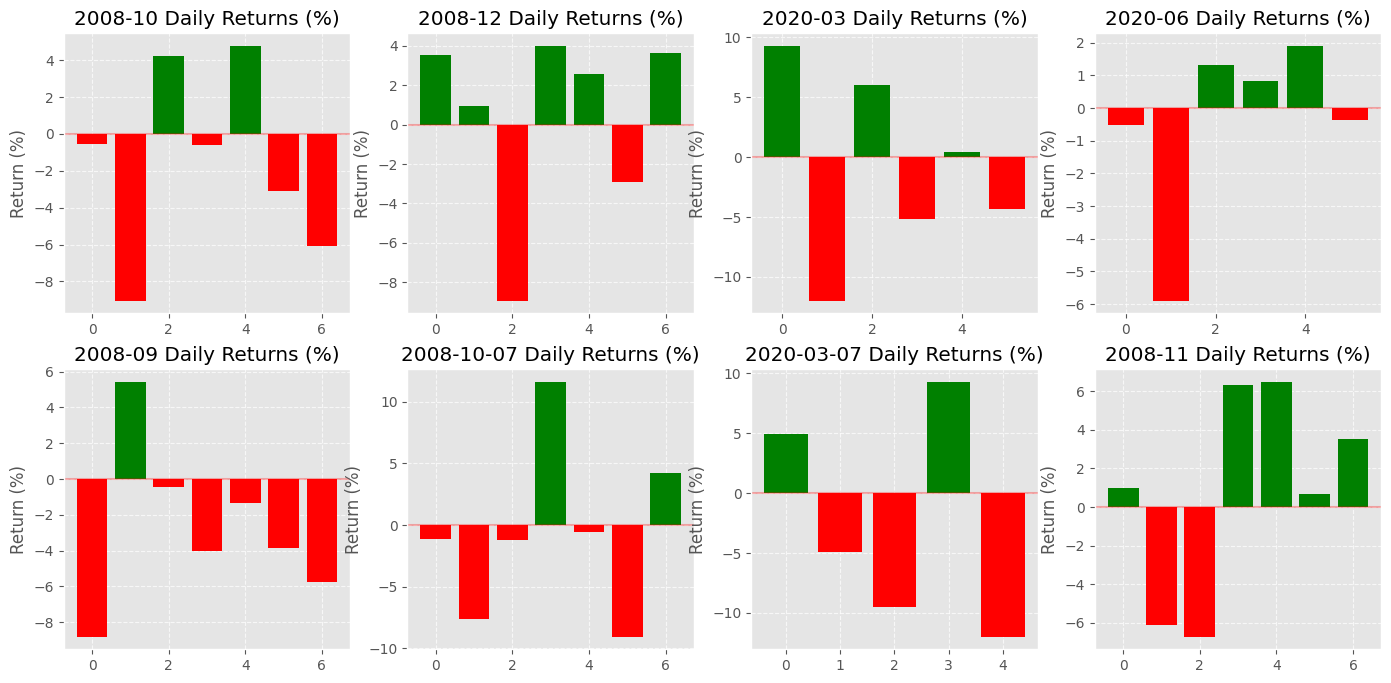

In [94]:
plt.figure(figsize=(17, 8))
plt.subplot(2,4,1)
plot(c0810, '2008-10')
plt.subplot(2,4,2)
plot(c0812, '2008-12')
plt.subplot(2,4,3)
plot(c2003, '2020-03')
plt.subplot(2,4,4)
plot(c2006, '2020-06')

plt.subplot(2,4,5)
plot(c0809, '2008-09')
plt.subplot(2,4,6)
plot(c081007, '2008-10-07')
plt.subplot(2,4,7)
plot(c200307, '2020-03-07')
plt.subplot(2,4,8)
plot(c0811, '2008-11')

In [90]:
p = pl.get_close_price_during('^SPX', '2008-01-01', '2024-12-07')
df = pd.DataFrame(list(p.items()), columns=['Date', 'Price'])
df['Return'] = df['Price'].pct_change().fillna(0) * 100
df['r7d'] = df['Price'].pct_change(periods=7).shift(-7) * 100
df.sort_values(by='Return').head(20)

,Date,Price,Return,r7d
3071,2020-03-16,2386.12988,-11.984055,3.747918
3069,2020-03-12,2480.63989,-9.511268,-9.805534
199,2008-10-15,907.84003,-9.034978,-3.422410
231,2008-12-01,816.21002,-8.929525,10.172623
187,2008-09-29,1106.42004,-8.806777,-10.979559
195,2008-10-09,909.91998,-7.616710,8.295239
3066,2020-03-09,2746.56006,-7.596970,-12.687141
225,2008-11-20,752.44000,-6.712294,12.807666
907,2011-08-08,1119.45996,-6.663447,6.648747
224,2008-11-19,806.58002,-6.115558,1.193930


In [85]:
df.head(20)

,Date,Price,Return
0,2008-01-02,1447.16003,0.000000
1,2008-01-03,1447.16003,0.000000
2,2008-01-04,1411.63001,-2.455155
3,2008-01-07,1416.18005,0.322325
4,2008-01-08,1390.18994,-1.835226
5,2008-01-09,1409.13001,1.362409
6,2008-01-10,1420.32996,0.794813
7,2008-01-11,1401.02002,-1.359539
8,2008-01-14,1416.25000,1.087064
9,2008-01-15,1380.94995,-2.492501


In [88]:
df.Price.pct_change(periods=7).shift(-7).head(20)

0    -0.031883
1    -0.021359
2    -0.021734
3    -0.030349
4    -0.040958
5    -0.059569
6    -0.077327
7    -0.044553
8    -0.045317
9    -0.036453
10   -0.014011
11    0.021789
12    0.023106
13    0.051927
14    0.042447
15    0.021264
16    0.004532
17   -0.020318
18   -0.018638
19   -0.018085
Name: Price, dtype: float64

0     0.032933
1     0.021825
2     0.022217
3     0.031299
4     0.042708
5     0.063342
6     0.083808
7     0.046631
8     0.047468
9     0.037832
10    0.014210
11   -0.021324
12   -0.022584
13   -0.049363
14   -0.040719
15   -0.020821
16   -0.004511
17    0.020740
18    0.018992
19    0.018418
Name: Price, dtype: float64